Análisis ACS

Primero analizamos la demanda de ACS (línea base). Queremos saber el consumo de energía a lo largo del año

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


ACS_demand= pd.read_csv("Results designbuilder\demanda calefaccion y ACS.csv", sep= ";")
ACS_demand=ACS_demand.drop([0])
ACS_demand["Heating (Electricity)"]= ACS_demand["Heating (Electricity)"].astype("float64")
ACS_demand["DHW (Electricity)"]= ACS_demand["DHW (Electricity)"].astype("float64")
calef_base= ACS_demand["Heating (Electricity)"].sum()
ACS_base= ACS_demand["DHW (Electricity)"].sum()
costo_elec= 0.57


print("La demanda de calefacción es de ",calef_base, "kWh. La demanda de ACS es de" ,ACS_base, "kWh")
print("El costo de calefacción es de", calef_base*costo_elec, "soles. El costo de ACS es de ", ACS_base*costo_elec, "soles")
ACS_demand

La demanda de calefacción es de  7821.9928870001 kWh. La demanda de ACS es de 7164.97482 kWh
El costo de calefacción es de 4458.535945590057 soles. El costo de ACS es de  4084.0356474 soles


,Date/Time,Lighting,Heating (Electricity),DHW (Electricity),Unnamed: 4
1,1/01/2002 01:00:00,0,0.752360,0.000000,NaN
2,1/01/2002 02:00:00,0,0.986538,0.000000,NaN
3,1/01/2002 03:00:00,0,1.169257,0.000000,NaN
4,1/01/2002 04:00:00,0,1.307272,0.000000,NaN
5,1/01/2002 05:00:00,0,1.442068,0.000000,NaN
...,...,...,...,...,...
8756,31/12/2002 20:00:00,0.323354,0.055839,4.907517,NaN
8757,31/12/2002 21:00:00,0.323354,0.324531,0.000000,NaN
8758,31/12/2002 22:00:00,0.323354,0.707946,0.000000,NaN
8759,31/12/2002 23:00:00,0.323354,1.011596,0.000000,NaN


Ahora analizamos el escenario con la propuesta de calefacción y ACS

Primero analizamos la propuesta de ACS

In [49]:
df_pr_cal= pd.read_csv("Results designbuilder\detailed ACS.csv", sep= ";", skiprows=1)
df_pr_cal=df_pr_cal.drop([0])
df_pr_cal["[1] Water Heater Electricity Rate (W)"]= df_pr_cal["[1] Water Heater Electricity Rate (W)"].astype("float64")
df_pr_cal["[1] Water Use Equipment Heating Rate (W)"]= df_pr_cal["[1] Water Use Equipment Heating Rate (W)"].astype("float64")
df_pr_cal["[1] Water Use Equipment Heating Rate (W).1"]= df_pr_cal["[1] Water Use Equipment Heating Rate (W).1"].astype("float64")
df_pr_cal["demanda_total"]= df_pr_cal["[1] Water Use Equipment Heating Rate (W)"]+df_pr_cal["[1] Water Use Equipment Heating Rate (W).1"]


backup= df_pr_cal["[1] Water Heater Electricity Rate (W)"].sum()*10**(-3)
horas=df_pr_cal["Date/Time"].str.split(' ', expand= True)
df_pr_cal["Hora"]= horas[1]
df_pr_cal["Date/Time"]=pd.to_datetime(df_pr_cal["Date/Time"])
df_pr_cal=df_pr_cal.set_index("Date/Time")


print("La demanda cubierta por el backup en la calefacción es de ", backup, "kWh con un costo de ", backup*costo_elec)
df_pr_cal

La demanda cubierta por el backup en la calefacción es de  660.3003393229097 kWh con un costo de  376.3711934140585


,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Water Heater Electricity Rate (W),[1] Water Use Equipment Heating Rate (W),[1] Water Use Equipment Heating Rate (W).1,demanda_total,Hora
Date/Time,,,,,,,
2002-01-01 01:00:00,0,0,0.000000,0.000000,0.000000,0.000000,01:00
2002-01-01 02:00:00,0,0,0.000000,0.000000,0.000000,0.000000,02:00
2002-01-01 03:00:00,0,0,0.000000,0.000000,0.000000,0.000000,03:00
2002-01-01 04:00:00,0,0,0.000000,0.000000,0.000000,0.000000,04:00
2002-01-01 05:00:00,0,0,0.000000,0.000000,0.000000,0.000000,05:00
...,...,...,...,...,...,...,...
2002-12-31 20:00:00,0,0,135.389669,2895.995001,383.989041,3279.984042,20:00
2002-12-31 21:00:00,0,0,230.197396,0.000000,0.000000,0.000000,21:00
2002-12-31 22:00:00,0,0,0.000000,0.000000,0.000000,0.000000,22:00


La demanda horia de ACS es  15.64939403450856


C:\Users\mayte\AppData\Local\Temp\ipykernel_13672\908991628.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  demanda_hora= demanda_ACS.groupby(by= "Hora").mean()*10**(-3)


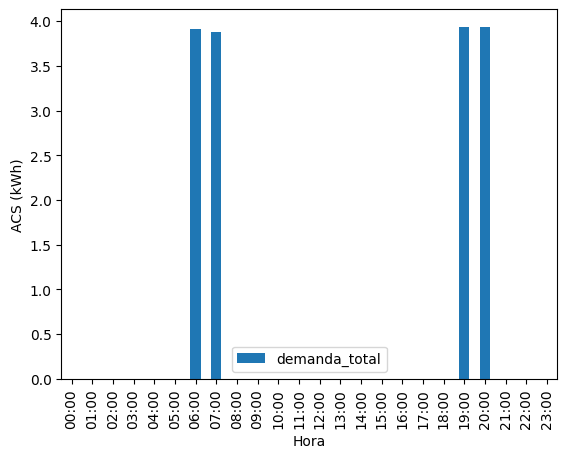

In [50]:

demanda_ACS= df_pr_cal.loc["2002-06":"2002-08"]
demanda_hora= demanda_ACS.groupby(by= "Hora").mean()*10**(-3)

demanda_hora.plot.bar(y="demanda_total")
plt.ylabel("ACS (kWh)")


hora_ACS= demanda_hora["demanda_total"].sum()

print("La demanda horia de ACS es ", hora_ACS)


Text(0, 0.5, 'Backup (kWh)')

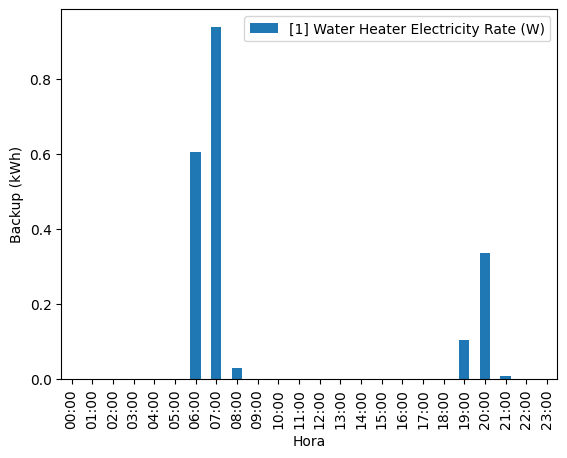

In [51]:

demanda_hora.plot.bar(y="[1] Water Heater Electricity Rate (W)")
plt.ylabel("Backup (kWh)")

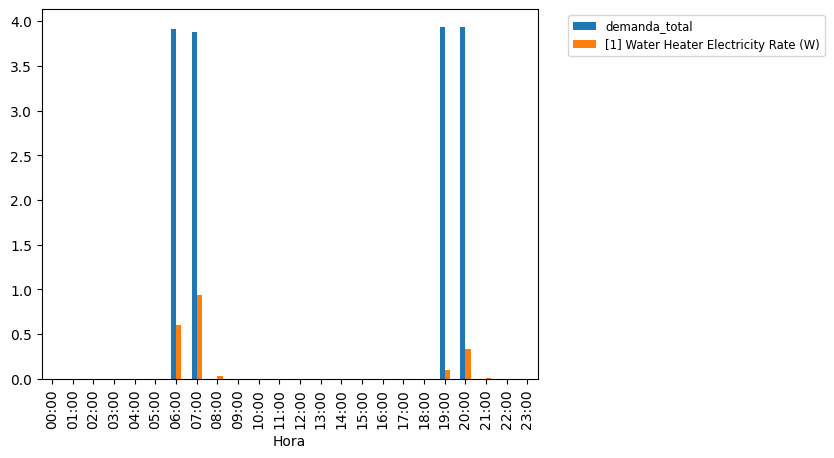

In [52]:
import matplotlib.pyplot as plt
import numpy as np

ax= demanda_hora[["demanda_total", "[1] Water Heater Electricity Rate (W)"]].plot(kind="bar")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')


Ahora analizamos la propuesta de calefacción

In [53]:
df_pr_cal= pd.read_csv("Results designbuilder\detailed calefaccion.csv", sep= ";", skiprows=1)
df_pr_cal=df_pr_cal.drop([0])
df_pr_cal["[1] Water Heater Electricity Rate (W)"]= df_pr_cal["[1] Water Heater Electricity Rate (W)"].astype("float64")
df_pr_cal["[1] Site Diffuse Solar Radiation Rate per Area (W/m2)"]= df_pr_cal["[1] Site Diffuse Solar Radiation Rate per Area (W/m2)"].astype("float64")
df_pr_cal["[1] Site Direct Solar Radiation Rate per Area (W/m2)"]= df_pr_cal["[1] Site Direct Solar Radiation Rate per Area (W/m2)"].astype("float64")

df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W)"]= df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W)"].astype("float64")
df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).1"]= df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).1"].astype("float64")
df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).2"]= df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).2"].astype("float64")
df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).3"]= df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).3"].astype("float64")
df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).4"]= df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).4"].astype("float64")
df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).5"]= df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).5"].astype("float64")
df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).6"]= df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).6"].astype("float64")
df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).7"]= df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).7"].astype("float64")
df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).8"]= df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).8"].astype("float64")
df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).9"]= df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).9"].astype("float64")
df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).10"]= df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).10"].astype("float64")
df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).11"]= df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).11"].astype("float64")
df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).12"]= df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).12"].astype("float64")
df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).13"]= df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).13"].astype("float64")
df_pr_cal["[1] Zone Operative Temperature (C)"]= df_pr_cal["[1] Zone Operative Temperature (C)"].astype("float64")


df_pr_cal["Demanda"]=df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W)"]+df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).1"]+df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).10"]+df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).11"]+df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).12"]+df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).13"]+df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).2"]+df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).3"]+df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).4"]+df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).5"]+df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).6"]+df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).7"]+df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).8"]+df_pr_cal["[1] Zone Radiant HVAC Heating Rate (W).9"]

backup= df_pr_cal["[1] Water Heater Electricity Rate (W)"].sum()*10**(-3)

print("La demanda cubierta por el backup en la calefacción es de ", backup, "kWh con un costo de ", backup*costo_elec)
df_pr_cal

La demanda cubierta por el backup en la calefacción es de  2146.2940373227434 kWh con un costo de  1223.3876012739636


,Date/Time,[1] Water Heater Electricity Rate (W),[1] Zone Radiant HVAC Heating Rate (W),[1] Zone Radiant HVAC Heating Rate (W).1,[1] Zone Radiant HVAC Heating Rate (W).2,[1] Zone Radiant HVAC Heating Rate (W).3,[1] Zone Radiant HVAC Heating Rate (W).4,[1] Zone Radiant HVAC Heating Rate (W).5,[1] Zone Radiant HVAC Heating Rate (W).6,[1] Zone Radiant HVAC Heating Rate (W).7,[1] Zone Radiant HVAC Heating Rate (W).8,[1] Zone Radiant HVAC Heating Rate (W).9,[1] Zone Radiant HVAC Heating Rate (W).10,[1] Zone Radiant HVAC Heating Rate (W).11,[1] Zone Radiant HVAC Heating Rate (W).12,[1] Zone Radiant HVAC Heating Rate (W).13,[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Zone Operative Temperature (C),Demanda
1,1/01/2002 01:00,0.000000,20.078548,6.691570,5.474005,6.682470,17.388251,6.985795,26.997508,41.450171,5.726437,17.028887,15.769771,15.377473,17.077717,62.143190,0.0,0.0,19.296832,264.871795
2,1/01/2002 02:00,0.000000,114.933430,74.235903,73.552080,74.215462,93.469839,74.742031,126.408525,146.556468,73.488001,92.830391,92.041500,90.783903,92.928075,163.916391,0.0,0.0,18.955736,1384.102001
3,1/01/2002 03:00,0.000000,208.356375,152.631386,154.314046,152.631242,168.601503,153.002176,218.371576,241.858816,153.456233,168.097890,169.635665,167.767909,168.212873,255.345876,0.0,0.0,18.649797,2532.283568
4,1/01/2002 04:00,0.000000,270.924480,209.031333,212.589763,209.070336,221.121117,209.244807,279.063549,302.789526,211.089825,220.788069,224.168386,221.915597,220.927440,312.157191,0.0,0.0,18.381947,3324.881419
5,1/01/2002 05:00,0.000000,327.981376,261.596042,266.697007,261.686180,270.695104,261.672337,334.755301,358.891974,264.633779,270.511241,275.403829,272.806325,270.687608,365.205109,0.0,0.0,18.147414,4063.223212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31/12/2002 20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,19.882502,0.000000
8757,31/12/2002 21:00,0.000000,5.311940,0.000000,0.000000,0.000000,21.744888,0.000000,31.121287,11.962738,0.000000,21.321665,23.309694,19.628590,22.034079,61.721440,0.0,0.0,19.516074,218.156321
8758,31/12/2002 22:00,0.000000,58.884537,19.805704,21.862374,20.184531,88.197641,19.982648,115.039174,88.795775,20.104313,87.688750,91.099722,86.301083,88.572794,155.358225,0.0,0.0,19.111704,961.877270
8759,31/12/2002 23:00,0.000000,164.566828,111.119725,115.367128,111.750318,161.472789,111.364810,205.763987,196.673777,112.775965,161.107041,165.554360,161.188374,161.813398,243.467218,0.0,0.0,18.736120,2183.985719


La demanda de calefaccion diaria es de 24384.46797637194


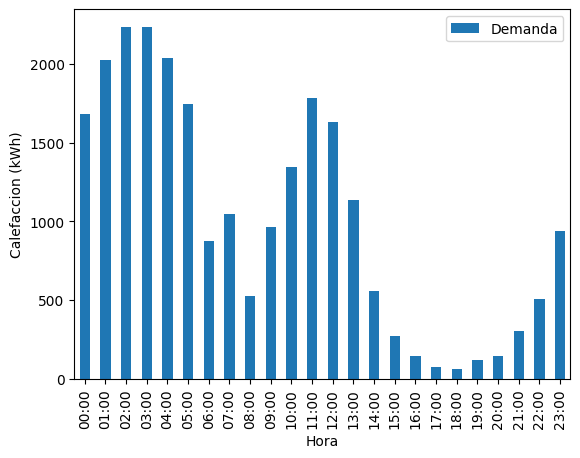

In [54]:
horas=df_pr_cal["Date/Time"].str.split(' ', expand= True)
df_pr_cal["Hora"]= horas[1]
df_pr_cal["Date/Time"]=pd.to_datetime(df_pr_cal["Date/Time"])
df_pr_cal=df_pr_cal.set_index("Date/Time")

demanda_calef= df_pr_cal.loc["2002-07":"2002-08"]
demanda_hora= demanda_calef.groupby(by= "Hora").mean()
demanda_hora.plot.bar(y="Demanda")
plt.ylabel("Calefaccion (kWh)")
print("La demanda de calefaccion diaria es de", demanda_hora["Demanda"].sum())

In [71]:
demanda_hora

,[1] Water Heater Electricity Rate (W),[1] Zone Radiant HVAC Heating Rate (W),[1] Zone Radiant HVAC Heating Rate (W).1,[1] Zone Radiant HVAC Heating Rate (W).2,[1] Zone Radiant HVAC Heating Rate (W).3,[1] Zone Radiant HVAC Heating Rate (W).4,[1] Zone Radiant HVAC Heating Rate (W).5,[1] Zone Radiant HVAC Heating Rate (W).6,[1] Zone Radiant HVAC Heating Rate (W).7,[1] Zone Radiant HVAC Heating Rate (W).8,[1] Zone Radiant HVAC Heating Rate (W).9,[1] Zone Radiant HVAC Heating Rate (W).10,[1] Zone Radiant HVAC Heating Rate (W).11,[1] Zone Radiant HVAC Heating Rate (W).12,[1] Zone Radiant HVAC Heating Rate (W).13,[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Zone Operative Temperature (C),Demanda
Hora,,,,,,,,,,,,,,,,,,,
00:00,213.970422,169.532568,136.422772,136.490312,136.567748,81.177343,136.671951,102.958957,189.461581,136.392843,80.904915,82.855741,80.469091,81.347988,131.025518,0.000000,0.000000,18.324053,1682.279328
01:00,262.629842,194.971236,158.287785,159.028170,158.361320,104.468734,158.469524,133.355175,212.183218,158.869867,104.181681,106.836069,104.170643,104.647838,163.900749,0.000000,0.000000,17.996793,2021.732007
02:00,325.857475,201.111489,166.099372,167.488688,166.117959,126.678130,166.194889,160.772793,214.110087,167.189662,126.422464,129.705098,126.940281,126.853113,186.773302,0.000000,0.000000,17.700208,2232.457325
03:00,364.614698,190.355539,160.674512,162.266804,160.660480,136.271914,160.703716,168.143386,198.395569,161.955018,136.125635,139.368169,137.161416,136.435557,185.829345,0.000000,0.000000,17.424432,2234.347061
04:00,408.829009,164.674554,143.684696,145.062932,143.655582,132.117735,143.667549,157.453368,165.821561,144.857387,132.067323,134.777077,133.231818,132.259870,165.564284,0.000000,0.000000,17.162342,2038.895736
05:00,423.861794,132.885914,121.134826,121.901920,121.093180,119.503773,121.092477,136.736517,128.636750,121.980664,119.521629,121.268435,120.534573,119.603762,136.479456,0.000000,0.000000,16.913405,1742.373876
06:00,430.309061,58.489573,60.055570,59.840374,60.005415,66.564658,60.026450,68.769880,53.411372,60.178102,66.609140,66.752797,66.914800,66.577487,63.308309,5.754032,6.770161,16.670204,877.503926
07:00,430.832630,72.096893,71.337984,71.229824,71.288234,78.395174,71.303261,82.383892,67.453137,71.557415,78.450227,78.517003,78.822578,78.401520,76.701190,76.165323,64.415323,16.493629,1047.938331
08:00,430.832630,31.626787,35.865919,35.655539,35.827067,41.842911,35.845112,40.189160,28.400705,35.857415,41.879906,41.960709,42.013110,41.860051,36.964822,262.403226,160.250000,16.667708,525.789212


<AxesSubplot: xlabel='Hora'>

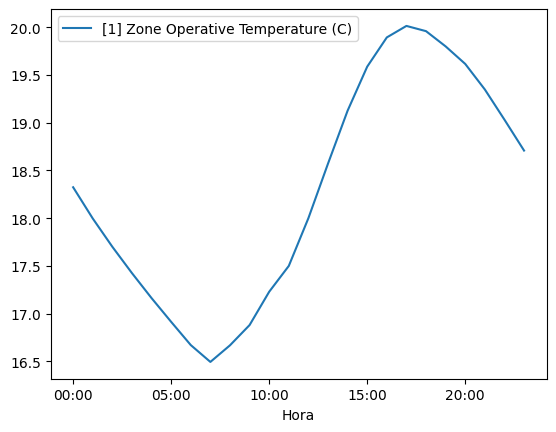

In [70]:
demanda_hora.plot(y="[1] Zone Operative Temperature (C)")

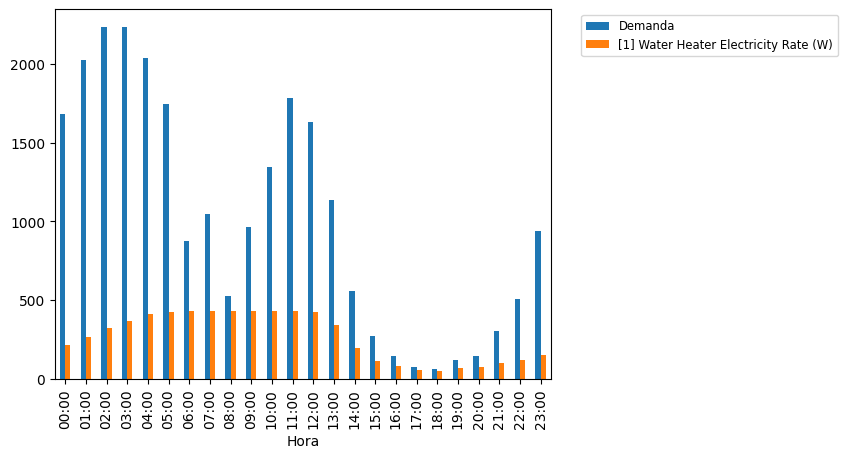

In [55]:
import matplotlib.pyplot as plt
import numpy as np

ax= demanda_hora[["Demanda", "[1] Water Heater Electricity Rate (W)"]].plot(kind="bar")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')

Cálculo del factor solar

In [56]:

df_detailed=df_pr_cal.resample("M").sum()
A= 2*4.95
df_detailed= df_detailed.drop(["2003-01-31"])
df_detailed["demand"]=(df_detailed["[1] Zone Radiant HVAC Heating Rate (W)"])*13
df_detailed["f"]= (df_detailed["Demanda"]-df_detailed["[1] Water Heater Electricity Rate (W)"])/((df_detailed["Demanda"]))
df_detailed["irradiacion"]= (df_detailed["[1] Site Diffuse Solar Radiation Rate per Area (W/m2)"]+df_detailed["[1] Site Direct Solar Radiation Rate per Area (W/m2)"])*A
df_detailed["n"]= df_detailed["Demanda"]/ ((df_detailed["irradiacion"]+df_detailed["[1] Water Heater Electricity Rate (W)"])*0.86*0.86)

C:\Users\mayte\AppData\Local\Temp\ipykernel_13672\195508929.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_detailed=df_pr_cal.resample("M").sum()


In [43]:
df_detailed

,[1] Water Heater Electricity Rate (W),[1] Zone Radiant HVAC Heating Rate (W),[1] Zone Radiant HVAC Heating Rate (W).1,[1] Zone Radiant HVAC Heating Rate (W).2,[1] Zone Radiant HVAC Heating Rate (W).3,[1] Zone Radiant HVAC Heating Rate (W).4,[1] Zone Radiant HVAC Heating Rate (W).5,[1] Zone Radiant HVAC Heating Rate (W).6,[1] Zone Radiant HVAC Heating Rate (W).7,[1] Zone Radiant HVAC Heating Rate (W).8,...,[1] Zone Radiant HVAC Heating Rate (W).12,[1] Zone Radiant HVAC Heating Rate (W).13,[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Zone Operative Temperature (C),Demanda,demand,f,irradiacion,n
Date/Time,,,,,,,,,,,,,,,,,,,,,
2002-01-31,158006.450022,54879.898011,47378.708281,48209.147069,47444.435629,45783.357933,47390.906222,52431.811838,60702.006007,47704.507771,...,45830.857963,58887.139766,73130.25,115136.00,14101.864179,694902.225681,713438.674137,0.772621,1863835.875,0.464707
2002-02-28,178861.279542,52471.119253,46255.851749,47126.718848,46325.743652,41365.594983,46251.031384,46810.786264,57184.706736,46578.006067,...,41445.394969,52171.988401,66185.00,99136.25,12448.459873,649158.080086,682124.550294,0.724472,1636680.375,0.483445
2002-03-31,196083.458871,58848.071747,51755.268195,52677.920838,51839.762688,44340.616933,51759.650531,50364.421290,64492.369100,52060.606754,...,44426.073475,57189.239577,67658.75,106254.25,13784.300634,713871.328607,765024.932716,0.725324,1721738.700,0.503286
2002-04-30,193486.477343,61400.446534,54509.738104,55479.242936,54593.811191,41609.808749,54508.069636,47300.418738,67206.748159,54833.464095,...,41702.707747,54122.325114,74532.75,93681.00,13250.644674,713236.190839,798205.804939,0.728720,1665316.125,0.518804
2002-05-31,166021.097549,69719.828463,62628.645750,63596.249746,62711.172171,37281.470059,62642.160952,42902.342949,77037.818158,62871.712352,...,37373.338064,51448.786378,128752.00,73734.25,13827.230645,743183.202856,906357.770015,0.776608,2004613.875,0.462927
2002-06-30,208417.769768,70128.118653,63351.548654,64520.426875,63464.647180,36583.911702,63346.352136,41432.367578,75945.748410,63682.100338,...,36703.382050,49137.044491,111967.00,72892.50,13032.872782,739317.869150,911665.542486,0.718095,1830109.050,0.490363
2002-07-31,219456.062478,69812.870213,63337.831850,64458.045419,63445.842947,38463.643868,63328.953066,43308.593451,75384.013777,63667.196202,...,38577.844012,50627.138494,119534.75,75606.00,13421.766295,751058.900922,907567.312765,0.707804,1931893.425,0.472026
2002-08-31,175392.193736,67020.887633,59729.887845,60688.858290,59816.830927,42756.158538,59736.471950,48778.186782,73349.106561,60025.573803,...,42844.861892,56644.721752,102663.50,87263.75,13772.855243,760778.113613,871271.539233,0.769457,1880279.775,0.500388
2002-09-30,194379.423187,56520.067873,50081.934351,50981.163205,50161.811451,42877.210228,50079.594738,48299.215157,61799.291856,50390.326718,...,42965.750140,54639.337044,62764.00,102047.00,13301.631633,688484.658416,734760.882351,0.717671,1631628.900,0.509794


0.7460099499310245 0.4758089053016128


Text(0, 0.5, 'n')

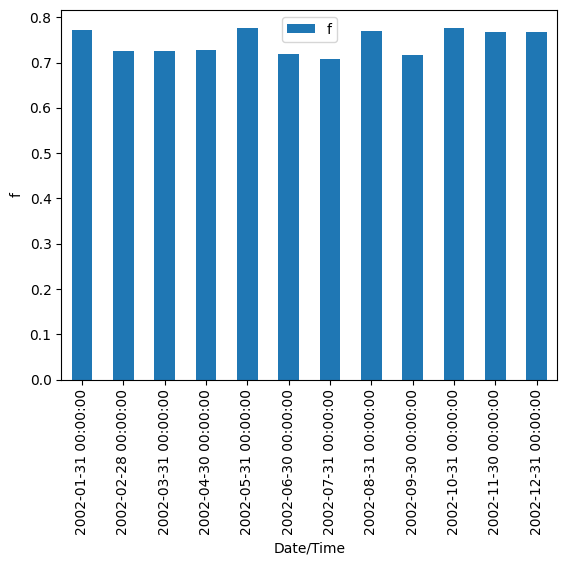

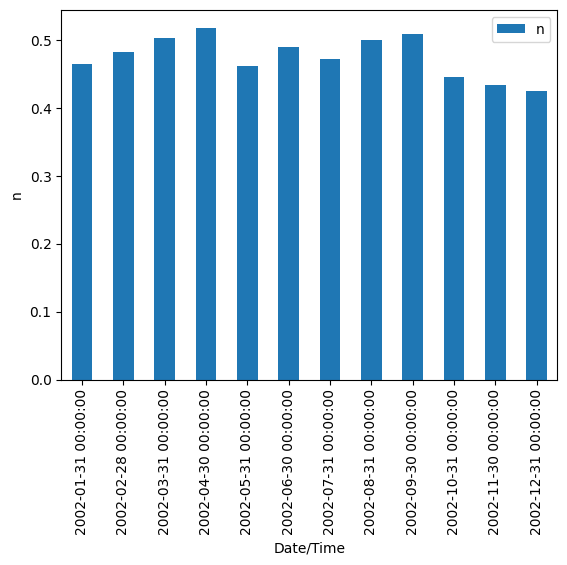

In [57]:
print(df_detailed["f"].mean(), df_detailed["n"].mean() )
import matplotlib.pyplot as plt
df_detailed.plot.bar(y="f")
plt.ylabel("f")
df_detailed.plot.bar(y="n")
plt.ylabel("n")

Ahora analizamos económicamente el proyecto. Calculamos los tiempos de retorno de la inversión, en base al VPN

In [58]:
import numpy as np
import numpy_financial as npf

#Definir los flujos de efectivo del proyecto
flujos_efectivo=[-15000, 6745.57,6745.57,6745.57, 6745.57]
inversion_inicial= 15000
#Definir la tasa de descuento
tasa_descuento= 0.12

#Calcular el VPN del proyecto
vpn= npf.npv(tasa_descuento, flujos_efectivo)

#Calculo del tir
tir= npf.irr(flujos_efectivo)

#Cálculo del tir
def calcular_tir(flujos_efectivo, inversion_inicial):
    for i in range(1, len(flujos_efectivo)):
        acumulado = sum(flujos_efectivo[1:i+1])
        if acumulado >= inversion_inicial:
            tir = i + ((inversion_inicial - sum(flujos_efectivo[1:i])) / flujos_efectivo[i+1])
            return tir
    return None

#Calculo el tiempo de retorno de la inversión
tir = calcular_tir(flujos_efectivo, inversion_inicial)

print("El VPN del proyecto es: ", round (vpn,2))
print("El TIR es de", tir)

El VPN del proyecto es:  5488.65
El TIR es de 3.223681616231097


In [62]:
demanda_hora

,[1] Water Heater Electricity Rate (W),[1] Zone Radiant HVAC Heating Rate (W),[1] Zone Radiant HVAC Heating Rate (W).1,[1] Zone Radiant HVAC Heating Rate (W).2,[1] Zone Radiant HVAC Heating Rate (W).3,[1] Zone Radiant HVAC Heating Rate (W).4,[1] Zone Radiant HVAC Heating Rate (W).5,[1] Zone Radiant HVAC Heating Rate (W).6,[1] Zone Radiant HVAC Heating Rate (W).7,[1] Zone Radiant HVAC Heating Rate (W).8,[1] Zone Radiant HVAC Heating Rate (W).9,[1] Zone Radiant HVAC Heating Rate (W).10,[1] Zone Radiant HVAC Heating Rate (W).11,[1] Zone Radiant HVAC Heating Rate (W).12,[1] Zone Radiant HVAC Heating Rate (W).13,[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Zone Operative Temperature (C),Demanda
Hora,,,,,,,,,,,,,,,,,,,
00:00,213.970422,169.532568,136.422772,136.490312,136.567748,81.177343,136.671951,102.958957,189.461581,136.392843,80.904915,82.855741,80.469091,81.347988,131.025518,0.000000,0.000000,18.324053,1682.279328
01:00,262.629842,194.971236,158.287785,159.028170,158.361320,104.468734,158.469524,133.355175,212.183218,158.869867,104.181681,106.836069,104.170643,104.647838,163.900749,0.000000,0.000000,17.996793,2021.732007
02:00,325.857475,201.111489,166.099372,167.488688,166.117959,126.678130,166.194889,160.772793,214.110087,167.189662,126.422464,129.705098,126.940281,126.853113,186.773302,0.000000,0.000000,17.700208,2232.457325
03:00,364.614698,190.355539,160.674512,162.266804,160.660480,136.271914,160.703716,168.143386,198.395569,161.955018,136.125635,139.368169,137.161416,136.435557,185.829345,0.000000,0.000000,17.424432,2234.347061
04:00,408.829009,164.674554,143.684696,145.062932,143.655582,132.117735,143.667549,157.453368,165.821561,144.857387,132.067323,134.777077,133.231818,132.259870,165.564284,0.000000,0.000000,17.162342,2038.895736
05:00,423.861794,132.885914,121.134826,121.901920,121.093180,119.503773,121.092477,136.736517,128.636750,121.980664,119.521629,121.268435,120.534573,119.603762,136.479456,0.000000,0.000000,16.913405,1742.373876
06:00,430.309061,58.489573,60.055570,59.840374,60.005415,66.564658,60.026450,68.769880,53.411372,60.178102,66.609140,66.752797,66.914800,66.577487,63.308309,5.754032,6.770161,16.670204,877.503926
07:00,430.832630,72.096893,71.337984,71.229824,71.288234,78.395174,71.303261,82.383892,67.453137,71.557415,78.450227,78.517003,78.822578,78.401520,76.701190,76.165323,64.415323,16.493629,1047.938331
08:00,430.832630,31.626787,35.865919,35.655539,35.827067,41.842911,35.845112,40.189160,28.400705,35.857415,41.879906,41.960709,42.013110,41.860051,36.964822,262.403226,160.250000,16.667708,525.789212


In [72]:
temperatura_sin_calefaccion= pd.read_csv("Results designbuilder/temperaturas_sin_calefaccion.csv", sep=";", skiprows= 1)
temperatura_sin_calefaccion= temperatura_sin_calefaccion.drop([0])
temperatura_sin_calefaccion["[1] Zone Operative Temperature (C)"]= temperatura_sin_calefaccion["[1] Zone Operative Temperature (C)"].astype("float64")


horas=temperatura_sin_calefaccion["Date/Time"].str.split(' ', expand= True)
temperatura_sin_calefaccion["Hora"]= horas[1]
temperatura_sin_calefaccion["Date/Time"]=pd.to_datetime(temperatura_sin_calefaccion["Date/Time"])
temperatura_sin_calefaccion=temperatura_sin_calefaccion.set_index("Date/Time")


temperatura_sin_calefaccion= temperatura_sin_calefaccion.loc["2002-07":"2002-08"]
temperatura_sin_calefaccion_df= temperatura_sin_calefaccion.groupby(by= "Hora").mean()






C:\Users\mayte\AppData\Local\Temp\ipykernel_13672\597092499.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temperatura_sin_calefaccion_df= temperatura_sin_calefaccion.groupby(by= "Hora").mean()


In [78]:
demanda_hora

,[1] Water Heater Electricity Rate (W),[1] Zone Radiant HVAC Heating Rate (W),[1] Zone Radiant HVAC Heating Rate (W).1,[1] Zone Radiant HVAC Heating Rate (W).2,[1] Zone Radiant HVAC Heating Rate (W).3,[1] Zone Radiant HVAC Heating Rate (W).4,[1] Zone Radiant HVAC Heating Rate (W).5,[1] Zone Radiant HVAC Heating Rate (W).6,[1] Zone Radiant HVAC Heating Rate (W).7,[1] Zone Radiant HVAC Heating Rate (W).8,[1] Zone Radiant HVAC Heating Rate (W).9,[1] Zone Radiant HVAC Heating Rate (W).10,[1] Zone Radiant HVAC Heating Rate (W).11,[1] Zone Radiant HVAC Heating Rate (W).12,[1] Zone Radiant HVAC Heating Rate (W).13,[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Zone Operative Temperature (C),Demanda
Hora,,,,,,,,,,,,,,,,,,,
00:00,213.970422,169.532568,136.422772,136.490312,136.567748,81.177343,136.671951,102.958957,189.461581,136.392843,80.904915,82.855741,80.469091,81.347988,131.025518,0.000000,0.000000,18.324053,1682.279328
01:00,262.629842,194.971236,158.287785,159.028170,158.361320,104.468734,158.469524,133.355175,212.183218,158.869867,104.181681,106.836069,104.170643,104.647838,163.900749,0.000000,0.000000,17.996793,2021.732007
02:00,325.857475,201.111489,166.099372,167.488688,166.117959,126.678130,166.194889,160.772793,214.110087,167.189662,126.422464,129.705098,126.940281,126.853113,186.773302,0.000000,0.000000,17.700208,2232.457325
03:00,364.614698,190.355539,160.674512,162.266804,160.660480,136.271914,160.703716,168.143386,198.395569,161.955018,136.125635,139.368169,137.161416,136.435557,185.829345,0.000000,0.000000,17.424432,2234.347061
04:00,408.829009,164.674554,143.684696,145.062932,143.655582,132.117735,143.667549,157.453368,165.821561,144.857387,132.067323,134.777077,133.231818,132.259870,165.564284,0.000000,0.000000,17.162342,2038.895736
05:00,423.861794,132.885914,121.134826,121.901920,121.093180,119.503773,121.092477,136.736517,128.636750,121.980664,119.521629,121.268435,120.534573,119.603762,136.479456,0.000000,0.000000,16.913405,1742.373876
06:00,430.309061,58.489573,60.055570,59.840374,60.005415,66.564658,60.026450,68.769880,53.411372,60.178102,66.609140,66.752797,66.914800,66.577487,63.308309,5.754032,6.770161,16.670204,877.503926
07:00,430.832630,72.096893,71.337984,71.229824,71.288234,78.395174,71.303261,82.383892,67.453137,71.557415,78.450227,78.517003,78.822578,78.401520,76.701190,76.165323,64.415323,16.493629,1047.938331
08:00,430.832630,31.626787,35.865919,35.655539,35.827067,41.842911,35.845112,40.189160,28.400705,35.857415,41.879906,41.960709,42.013110,41.860051,36.964822,262.403226,160.250000,16.667708,525.789212


In [79]:
demanda_hora["temp_sin_cal"]=temperatura_sin_calefaccion.iloc[:,0]


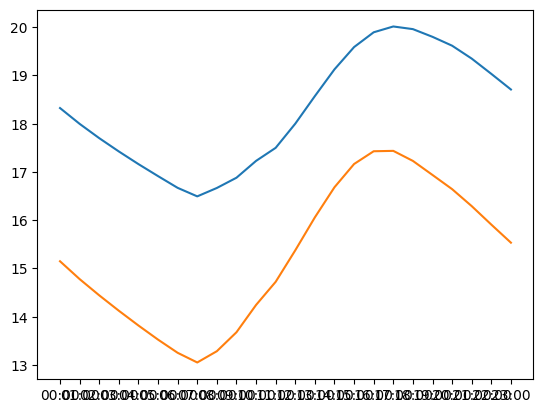

In [84]:
fig,ax= plt.subplots()
ax.plot(demanda_hora["[1] Zone Operative Temperature (C)"])
ax.plot(temperatura_sin_calefaccion_df["[1] Zone Operative Temperature (C)"])

In [80]:
demanda_hora

,[1] Water Heater Electricity Rate (W),[1] Zone Radiant HVAC Heating Rate (W),[1] Zone Radiant HVAC Heating Rate (W).1,[1] Zone Radiant HVAC Heating Rate (W).2,[1] Zone Radiant HVAC Heating Rate (W).3,[1] Zone Radiant HVAC Heating Rate (W).4,[1] Zone Radiant HVAC Heating Rate (W).5,[1] Zone Radiant HVAC Heating Rate (W).6,[1] Zone Radiant HVAC Heating Rate (W).7,[1] Zone Radiant HVAC Heating Rate (W).8,[1] Zone Radiant HVAC Heating Rate (W).9,[1] Zone Radiant HVAC Heating Rate (W).10,[1] Zone Radiant HVAC Heating Rate (W).11,[1] Zone Radiant HVAC Heating Rate (W).12,[1] Zone Radiant HVAC Heating Rate (W).13,[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Zone Operative Temperature (C),Demanda,temp_sin_cal
Hora,,,,,,,,,,,,,,,,,,,,
00:00,213.970422,169.532568,136.422772,136.490312,136.567748,81.177343,136.671951,102.958957,189.461581,136.392843,80.904915,82.855741,80.469091,81.347988,131.025518,0.000000,0.000000,18.324053,1682.279328,NaN
01:00,262.629842,194.971236,158.287785,159.028170,158.361320,104.468734,158.469524,133.355175,212.183218,158.869867,104.181681,106.836069,104.170643,104.647838,163.900749,0.000000,0.000000,17.996793,2021.732007,NaN
02:00,325.857475,201.111489,166.099372,167.488688,166.117959,126.678130,166.194889,160.772793,214.110087,167.189662,126.422464,129.705098,126.940281,126.853113,186.773302,0.000000,0.000000,17.700208,2232.457325,NaN
03:00,364.614698,190.355539,160.674512,162.266804,160.660480,136.271914,160.703716,168.143386,198.395569,161.955018,136.125635,139.368169,137.161416,136.435557,185.829345,0.000000,0.000000,17.424432,2234.347061,NaN
04:00,408.829009,164.674554,143.684696,145.062932,143.655582,132.117735,143.667549,157.453368,165.821561,144.857387,132.067323,134.777077,133.231818,132.259870,165.564284,0.000000,0.000000,17.162342,2038.895736,NaN
05:00,423.861794,132.885914,121.134826,121.901920,121.093180,119.503773,121.092477,136.736517,128.636750,121.980664,119.521629,121.268435,120.534573,119.603762,136.479456,0.000000,0.000000,16.913405,1742.373876,NaN
06:00,430.309061,58.489573,60.055570,59.840374,60.005415,66.564658,60.026450,68.769880,53.411372,60.178102,66.609140,66.752797,66.914800,66.577487,63.308309,5.754032,6.770161,16.670204,877.503926,NaN
07:00,430.832630,72.096893,71.337984,71.229824,71.288234,78.395174,71.303261,82.383892,67.453137,71.557415,78.450227,78.517003,78.822578,78.401520,76.701190,76.165323,64.415323,16.493629,1047.938331,NaN
08:00,430.832630,31.626787,35.865919,35.655539,35.827067,41.842911,35.845112,40.189160,28.400705,35.857415,41.879906,41.960709,42.013110,41.860051,36.964822,262.403226,160.250000,16.667708,525.789212,NaN
